In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from matplotlib import style
style.use('fivethirtyeight')

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func, inspect 

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# inspecting the data and retriving the table names 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# reflect an existing database into a new model
# reflect the tables
base = automap_base()
base.prepare(engine, reflect = True)
measurement = base.classes.measurement
station = base.classes.station

#We can view all of the classes that automap found
station_col = inspector.get_columns('station')
measurement_col = inspector.get_columns('measurement')

In [18]:
# Save references to each table
for i in measurement_col:
    print(i['name'], i['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
for i in station_col:
    print(i['name'], i['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

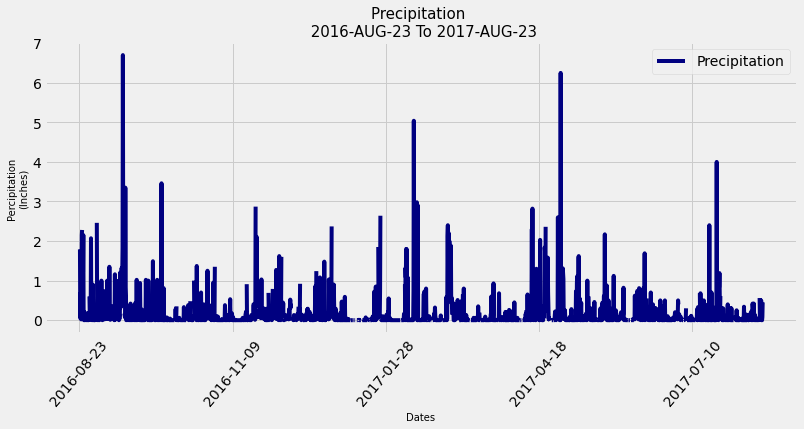

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

date = dt.datetime(2016, 8, 22)
results = session.query(measurement.date, measurement.prcp).filter(measurement.date > date).all()

d_frame = pd.DataFrame(results, columns = ['Date', 'Precipitation'])
d_frame.set_index('Date', inplace= True)
d_frame = d_frame.sort_index()

ax = d_frame.plot(rot=50, figsize=(12,5), color='navy')
ax.set_title('Precipitation \n 2016-AUG-23 To 2017-AUG-23', fontsize=15)
ax.set_ylabel('Percipitation\n(Inches)', fontsize=10)
ax.set_xlabel('Dates', fontsize=10)
plt.show()


In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
d_frame.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [42]:
# Query showing how many stations are available in Station dataset
num_of_station = session.query(func.count(station.station)).all()
num_of_station

[(9)]

In [46]:
# Station activity (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_frequency = session.query(measurement.station, func.count(measurement.station)).\
                                group_by(measurement.station).\
                                order_by(func.count(measurement.station).desc()).all()
station_frequency

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Station with the most activity
station_frequency[0][0]

'USC00519281'

In [59]:
# Calculating the lowest, highest, and average temperature of station with the most activity?

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == station_frequency[0][0]).all()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == station_frequency[0][0]).all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == station_frequency[0][0]).all()

print(lowest_temp)
print(highest_temp)
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 54., 32.,  9.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

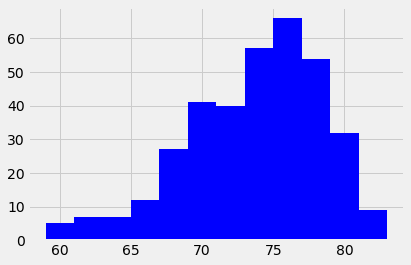

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

MAS_lastday = session.query(measurement.date).\
                filter(measurement.station == station_frequency[0][0]).\
                order_by(measurement.date.desc()).first()

last12months = (dt.datetime.strptime(MAS_lastday[0], '%Y-%m-%d') - dt.timedelta(days = 365)).strftime('%Y-%m-%d')

MAS_last12months = session.query(measurement.date, measurement.tobs).\
                    filter(measurement.station == station_frequency[0][0]).\
                    filter(measurement.date >= last12months).all()

df_MAS_L12M = pd.DataFrame(MAS_last12months, columns = ['Date', 'Temperature'])

fig, axs = plt.subplots(1, sharey=True)
axs.hist(df_MAS_L12M['Temperature'], bins=12, color='blue')


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
